# Homework 1

## References

+ Lectures 1 through 4 (inclusive).


## Instructions

+ Type your name and email in the "Student details" section below.
+ Develop the code and generate the figures you need to solve the problems using this notebook.
+ For the answers that require a mathematical proof or derivation you should type them using latex. If you have never written latex before and you find it exceedingly difficult, we will likely accept handwritten solutions.
+ The total homework points are 100. Please note that the problems are not weighed equally.

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
import seaborn as sns
sns.set_context("paper")
sns.set_style("ticks")

import numpy as np
import scipy
import scipy.stats as st
import urllib.request
import os

def download(
    url : str,
    local_filename : str = None
):
    """Download a file from a url.

    Arguments
    url            -- The url we want to download.
    local_filename -- The filemame to write on. If not
                      specified
    """
    if local_filename is None:
        local_filename = os.path.basename(url)
    urllib.request.urlretrieve(url, local_filename)

## Student details

+ **First Name:** Hannah
+ **Last Name:** Moskios
+ **Email:** hmoskios@purdue.edu
+ **Used generative AI to complete this assignment (Yes/No):** Yes
+ **Which generative AI tool did you use (if applicable)?:** ChatGPT 4o

## Problem 1

Disclaimer: This example is a modified version of the one found in a 2013 lecture on Bayesian Scientific Computing taught by Prof. Nicholas Zabaras.
I am not sure where the original problem is coming from.

We are tasked with assessing the usefulness of a tuberculosis test.
The prior information I is:

> The percentage of the population infected by tuberculosis is 0.4\%.
We have run several experiments and determined that:
+ If a tested patient has the disease, then 80\% of the time the test comes out positive.
+ If a tested patient does not have the disease, then 90\% of the time the test comes out negative.

To facilitate your analysis, consider the following logical sentences concerning a patient:

> A: The patient is tested and the test is positive.

> B: The patient has tuberculosis.

A. Find the probability that the patient has tuberculosis (before looking at the result of the test), i.e., $p(B|I)$. This is known as the base rate or the prior probability.<br>
**Answer:**
<br>
According to the problem statement, there is a 0.4% chance that a patient has tuberculosis, which equates to a probability of 0.004.

$\boxed{p(B|I) = 0.004}$

B. Find the probability that the test is positive given that the patient has tuberculosis, i.e., $p(A|B,I)$.<br>
**Answer:**
<br>
According to the problem statement, there is an 80% chance that the test result is positive ($A$), given the patient has the disease ($B$). This equates to a probability of 0.8.

$\boxed{p(A|B,I) = 0.8}$

C. Find the probability that the test is positive given that the patient does not have tuberculosis, i.e., $p(A|\neg B, I)$.<br>
**Answer:**
<br>
According to the problem statement, there is a 90% chance that the test is negative ($\neg A$), given the patient does not have the disease ($\neg B$):

$p(\neg A|\neg B,I) = 0.9$

According to the obvious rule:

$p(A|\neg B,I) + p(\neg A|\neg B,I) = 1$

$p(A|\neg B,I) = 1 - p(\neg A|\neg B,I)$

$p(A|\neg B,I) = 1 - 0.9$

$\boxed{p(A|\neg B,I) = 0.1}$

The probability that the test is positive, given the patient has tuberculosis is 0.1 (or 10%).

D. Find the probability that a patient that tested positive has tuberculosis, i.e., $p(B|A,I)$.<br>
**Answer:**
<br>
First, the probability of $A$ can be computed using the sum rule:

$p(A|I) =  p(A|B,I)p(B|I) + p(A|\neg B,I)p(\neg B|I)$

$p(A|I) =  p(A|B,I)p(B|I) + (1 - p(\neg A|\neg B,I))(1 - p(B|I))$

$p(A|I) = 0.8(0.004) + (1 - 0.9)(1 - 0.004)$

$p(A|I) = 0.1028$

According to the product rule:

$p(A,B|I) = p(A|B,I)p(B|I) = p(B|A,I)p(A|I)$

Rearranging this equation and plugging in the appropriate values gives the following:

$p(B|A,I) = \frac{p(A|B,I)p(B|I)}{p(A|I)}$

$p(B|A,I) = \frac{0.8(0.004)}{0.1028}$

$\boxed{p(B|A,I) = 0.031128}$

The probability that the patient has tuberculosis, given they test positive, is 0.031128 (or 3.1128%).


E. Find the probability that a patient that tested negative has tuberculosis, i.e., $p(B|\neg A, I)$. Does the test change our prior state of knowledge about about the patient? Is the test useful?<br>
**Answer:**
<br>
According to Bayes' rule:

$p(B|\neg A,I) = \frac{p(\neg A,B|I)}{p(\neg A,I)}$

$p(B|\neg A,I) = \frac{p(\neg A|B,I)p(B|I)}{p(\neg A|I)}$

Apply the obvious rule in the numerator and denominator:

$p(B|\neg A,I) = \frac{(1 - p(A|B,I))p(B|I)}{1 - p(A|I)}$

$p(B|\neg A,I) = \frac{(1-0.8)(0.004)}{1-0.1028}$

$\boxed{p(B|\neg A,I) = 0.00089}$

The probability that a patient has tuberculosis, given they tested positive, is 0.00089 (or 0.089%).

Yes, the test changes our prior state of knowledge about the patient, but only slightly. When the patient receives a positive result, the probability of disease increases from 0.4% to 3.1128%. When the patient receives a negative result, the probability of disease decreases from 0.4% to 0.089%.

Both of these changes are relatively small, meaning the test result is not very informative and does not drastically change our beliefs about the patient's state of disease. Therefore, the test is not very useful.

F. What would a good test look like? Find values for

$$
p(A|B,I)= p(\text{test is positive} |\text{has tuberculosis},I),
$$

and

$$
p(A| \neg B, I) = p(\text{test is positive}|\text{does not have tuberculosis}, I),
$$

so that

$$
p(B|A, I) = p(\text{has tuberculosis}|\text{test is positive}, I) = 0.99.
$$

There are more than one solutions. How would you pick a good one? Thinking in this way can help you set goals if you work in R\&D. If you have time, try to figure out whether or not there exists such an accurate test for tuberculosis<br>
**Answer:**
<br>
According to Bayes' rule:

$p(B|A,I) = \frac{p(B|I)p(A|B,I)}{p(B|I)p(A|B,I) + p(\neg B|I)p(A|\neg B,I)}$

From the problem statement, it is known that $p(B|I) = 0.004$. Also, the problem requires that $p(B|A,I) = 0.99$. Plugging these values into the above equation gives the following:

$0.99 = \frac{0.004p(A|B,I)}{0.004p(A|B,I) + (1 - 0.004)p(A|\neg B,I)}$

$0.00396p(A|B,I) + 0.98604p(A|\neg B,I) = 0.004p(A|B,I)$

$0.00004p(A|B,I) = 0.98604p(A|\neg B,I)$

The probabilities $p(A|B,I)$ and $p(A|\neg B,I)$ must satisfy the above equation. Using this relation, we can establish criteria for a good test. First, the test must have a very high sensitivity ($p(A|B,I)$). Ideally, the sensitivity is 1, which means that the test correctly identifies all patients who have the disease. In other words, there are no false negatives, meaning no one with the disease will be missed by the test:

$p(A|B,I) = 1$

Plugging this first criterion into the relation between $p(A|B,I)$ and $p(A|\neg B,I)$ gives the following:

$0.00004(1) = 0.98604p(A|\neg B,I)$

$p(A|\neg B,I) = 0.00004057 = 4.057 \times 10^{-5}$

As we can see, $p(A|\neg B,I)$ is very small. This is another important criteria for a good test, as it means that there are very few false positive test results. If a patient does not have the disease, it is very unlikely they will receive a positive test result.

Final Answers:

$\boxed{p(A|B,I) = 1}$

$\boxed{p(A|\neg B,I) = 4.057 \times 10^{-5}}$


## Problem 2 - Practice with discrete random variables

Consider the Categorical random variable:

$$
X \sim \operatorname{Categorical}(0.3, 0.1, 0.2, 0.4),
$$

taking values in $\{0,1,2,3\}$. Find the following (you may use ``scipy.stats.rv_discrete`` or do it by hand):

A. The expectation $\mathbb{E}[X]$.

**Answer:**
<br>
$\mathbb{E}[X] = \sum\limits_{x} xp(x)$

$\mathbb{E}[X] = x_1 p(x_1) + x_2 p(x_2) + x_3 p(x_3) + x_4^2 p(x_4)$

$\mathbb{E}[X] = 0(0.3) + 1(0.1) + 2(0.2) + 3(0.4)$

$\boxed{\mathbb{E}[X] = 1.7}$

In [2]:
# You can also answer with code here:
# Define the probabilities and corresponding values
ps = [0.3, 0.1, 0.2, 0.4]
xs = np.array([0, 1, 2, 3])

# Define the categorical random variable and compute the expectation
X = st.rv_discrete(name="Categorical Random Variable", values=(xs, ps))
print(f"E[X] = {X.expect():.2f}")

E[X] = 1.70


B. The variance $\mathbb{V}[X]$.

**Answer:**
<br>
First find the expectation of $X^2$:

$\mathbb{E}[X^2] = \sum\limits_{x} x^2p(x)$

$\mathbb{E}[X^2] = x_1^2 p(x_1) + x_2^2 p(x_2) + x_3^2 p(x_3) + x_4^2 p(x_4)$

$\mathbb{E^2}[X] = 0^2(0.3) + 1^2(0.1) + 2^2(0.2) + 3^2(0.4)$

$\mathbb{E^2}[X] = 4.5$

Then find the varaince of $X$:

$\mathbb{V}[X] = \mathbb{E}[X^2] - (\mathbb{E}[X])^2$

$\mathbb{V}[X] = 4.5 - 1.7^2$

$\boxed{\mathbb{V}[X] =  1.61}$

In [3]:
# You can also answer with code here:
print(f"V[X] = {X.var():.2f}")

V[X] = 1.61


C. Plot the probability mass function of $X$.

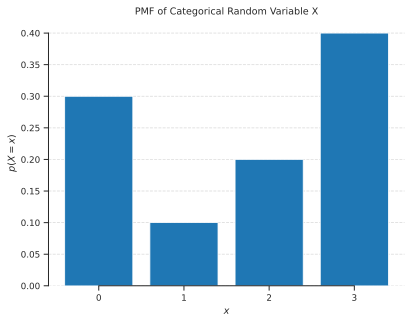

In [4]:
# Your code here. Hint: use a bar plot
fig, ax = plt.subplots()
ax.bar(xs, X.pmf(xs))
ax.set_xlabel("$x$")
ax.set_ylabel("$p(X = x)$")
ax.set_title("PMF of Categorical Random Variable X")
ax.set_xticks(xs)
ax.grid(axis='y', linestyle='--', alpha=0.7)
sns.despine(trim=True);

D. Find the probability that $X$ is in $\{0, 2\}$.

**Answer:**
<br>
$p(X \in \{0,2\}) = p(X = 0) + p(X = 2)$

$p(X \in \{0,2\}) = 0.3 + 0.2$

$\boxed{p(X \in \{0,2\}) = 0.5}$


In [7]:
# You can also answer with code here:
print("p(X = {0,2}) =", X.pmf(0) + X.pmf(2))

p(X = {0,2}) = 0.5


E. Find $\mathbb{E}[4X + 3]$.

**Answer:**
<br>
$\mathbb{E}[4X + 3] = \mathbb{E}[4X] + 3 = 4 \mathbb{E}[X] + 3 = 4(1.7) + 3$

$\boxed{\mathbb{E}[4X + 3] = 9.8}$

In [8]:
# You can also answer with code here:
print(f"E[4X + 3] = {4 * X.expect() + 3:.1f}")

E[4X + 3] = 9.8


F. Find $\mathbb{V}[4X+3]$.

**Answer:**
<br>
$\mathbb{V}[4X + 3] = \mathbb{V}[4X] = 4^2 \mathbb{V}[X] = 4^2(1.61)$

$\boxed{\mathbb{V}[4X + 3] = 25.76}$

In [9]:
# You can also answer with code here:
print(f"V[4X + 3] = {4**2 * X.var():.2f}")

V[4X + 3] = 25.76


## Problem 3 - Predicting the probability of major earthquakes in Southern California

The [San Andreas fault](https://en.wikipedia.org/wiki/San_Andreas_Fault) extends through California forming the boundary between the Pacific and the North American tectonic plates.
It has caused some of the major earthquakes on Earth.
We are going to focus on Southern California and we would like to assess the probability of a major earthquake, defined as an earthquake of magnitude 6.5 or greater, during the next ten years.

A. The first thing we are going to do is go over a [database of past earthquakes](https://scedc.caltech.edu/significant/chron-index.html) that have occured in Southern California and collect the relevant data. We are going to start at 1900 because data before that time may are unreliable.
Go over each decade and count the occurence of a major earthquake (i.e., count the number of organge and red colors in each decade). We have done this for you.

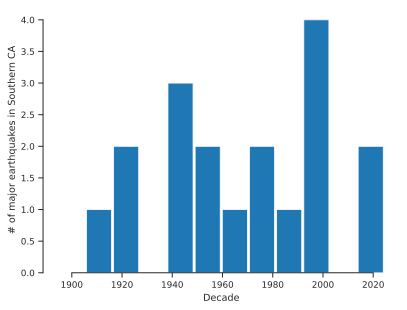

In [10]:
eq_data = np.array([
    0, # 1900-1909
    1, # 1910-1919
    2, # 1920-1929
    0, # 1930-1939
    3, # 1940-1949
    2, # 1950-1959
    1, # 1960-1969
    2, # 1970-1979
    1, # 1980-1989
    4, # 1990-1999
    0, # 2000-2009
    2 # 2010-2019
])
fig, ax = plt.subplots(dpi=150)
ax.bar(np.linspace(1900, 2019, eq_data.shape[0]), eq_data, width=10)
ax.set_xlabel('Decade')
ax.set_ylabel('# of major earthquakes in Southern CA')
# plt.legend(loc="best", frameon=False)
sns.despine(trim=True);

B. The [Poisson distribution](https://en.wikipedia.org/wiki/Poisson_distribution) is a discrete distribution with values $\{0,1,2,\dots\}$ which is commonly used to model the number of events occuring in a certain time period.
It is the right choice when these events are happening independently and the probability of any event happening over a small period of time is constant.
Let's use the Poisson to model the number of earthquakes $X$ occuring in a decade.
We write:

$$
X \sim \operatorname{Poisson}(r),
$$

where $r$ is the *rate parameter* of Poisson.
The rate is the number of events per time period.
Here, $r$ is the number of earthquakes per decade.
Using the data above, we can set the rate as the empirical average of the observed number of earthquakes per decade:

In [11]:
r = np.mean(eq_data)
print('r = {0:1.2f} major earthquakes per decade'.format(r))

r = 1.50 major earthquakes per decade


Strictly speaking, **this is not how you should be calibrating models!!!**
We will learn about the **right** way (which uses Bayes' rule) in the subsequent lectures.
But it will do for now as the answer you would get using the **right** way is, for this problem, almost the same.
Let's define a Poisson distribution using ``scipy.stats.poisson`` (see documentation [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.poisson.html)):

In [12]:
X = st.poisson(r)

A. Plot the probability mass function of ``X``.

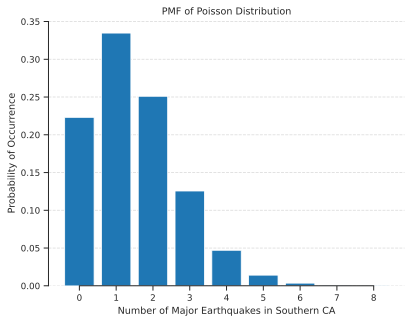

In [13]:
# Your code here
ks = np.arange(eq_data.max() + 5)
fig, ax = plt.subplots()
ax.bar(ks, X.pmf(ks))
ax.set_xlabel("Number of Major Earthquakes in Southern CA")
ax.set_ylabel("Probability of Occurrence")
ax.set_title("PMF of Poisson Distribution")
ax.set_xticks(ks)
ax.grid(axis='y', linestyle='--', alpha=0.7)
sns.despine(trim=True);

B. What is the probability that at least one major earthquake will occur during the next decade?<br>
**Answer:**
<br>
From the PMF above, it can be observed that the probability of 0 earthquakes occurring in a decade is $P(X = 0) = 0.223$.

$p(X \geq 1) = 1 - p(X = 0)$

$p(X \geq 1) = 1 - 0.223$

$\boxed{p(X \geq 1) = 0.777}$

The probability that at least one major earthquake will occur in the next decade is 0.777 (or 77.7%).

In [14]:
# You can also answer with code here:
print(f"p(X >= 1) = {1 - X.pmf(0):.3f}")

p(X >= 1) = 0.777


C. What is the probability that at least one major earthquake will occur during the next two decades?
Hint: Consider two independent and identical copies of $X$, say $X_1$ and $X_2$.
And consider their sum $Y = X_1 + X_2$. Read [this](https://en.wikipedia.org/wiki/Poisson_distribution#Sums_of_Poisson-distributed_random_variables) about the sum of two independent Poisson distributions.
<br>
**Answer:**
<br>
The sum of two independent Poisson distributions is as follows:

$\sum\limits_{i = 1}^{2}X_i \sim Poisson(\sum\limits_{i = 1}^{2} \lambda_i)$

$X_1 + X_2 \sim Poisson(\lambda_1 + \lambda_2)$

Plug in $\lambda_1 = \lambda_2 = 1.5$:

$X_1 + X_2 \sim Poisson(1.5 + 1.5)$

$X_1 + X_2 \sim Poisson(3)$

Find the probability that $X_1 + X_2$ is greater or equal to 1 using $\lambda = 3$:

$p(X_1 + X_2 \geq 1) = 1 - p(X_1 + X_2 = 0)$

$p(X_1 + X_2 \geq 1) = 1 - \frac{\lambda^0 e^{-\lambda}}{0!}$

$p(X_1 + X_2 \geq 1) = 1 - \frac{3^0 e^{-3}}{0!}$

$\boxed{p(X_1 + X_2 \geq 1) = 0.9502}$

The probability that there will be at least one major earthquake in the next 2 decades is 0.9502 (or 95.02%).

In [15]:
# You can also answer with code here:
lambda_1 = 1.5
lambda_2 = 1.5
r2 = lambda_1 + lambda_2
X2 = st.poisson(r2)
print(f"p(X1 + X2 >= 1) = {1 - X2.pmf(0):.4f}")

p(X1 + X2 >= 1) = 0.9502


D. What is the probability that at least one major earthquake will occur during the next five decades?<br>
**Answer:**
<br>
The sum of five independent Poisson distributions is as follows:

$\sum\limits_{i = 1}^{5}X_i \sim Poisson(\sum\limits_{i = 1}^{5} \lambda_i)$

$X_1 + X_2 + X_3 + X_4 + X_5 \sim Poisson(\lambda_1 + \lambda_2 + \lambda_3 + \lambda_4 + \lambda_5)$

Plug in $\lambda_1 = \lambda_2 = \lambda_3 = \lambda_4 = \lambda_5 = 1.5$:

$X_1 + X_2 + X_3 + X_4 + X_5 \sim Poisson(1.5 + 1.5 + 1.5 + 1.5 + 1.5)$

$X_1 + X_2 + X_3 + X_4 + X_5 \sim Poisson(7.5)$

Find the probability that $X_1 + X_2 + X_3 + X_4 + X_5$ is greater or equal to 1 using $\lambda = 7.5$:

$p(X_1 + X_2 + X_3 + X_4 + X_5 \geq 1) = 1 - p(X_1 + X_2 + X_3 + X_4 + X_5 = 0)$

$p(X_1 + X_2 + X_3 + X_4 + X_5 \geq 1) = 1 - \frac{\lambda^0 e^{-\lambda}}{0!}$

$p(X_1 + X_2 + X_3 + X_4 + X_5 \geq 1) = 1 - \frac{7.5^0 e^{-7.5}}{0!}$

$\boxed{p(X_1 + X_2 + X_3 + X_4 + X_5 \geq 1) = 0.99945}$

The probability that there will be at least one major earthquake in the next 5 decades is 0.99945 (or 99.945%).

In [16]:
# You can also answer with code here:
r5 = 7.5
X5 = st.poisson(r5)
print(f"p(X1 + X2 + X3 + X4 + X5 >= 1) = {1 - X5.pmf(0):.5f}")

p(X1 + X2 + X3 + X4 + X5 >= 1) = 0.99945


## Problem 4 - Failure of a mechanical component

Assume that you designing a gear for a mechanical system.
Under normal operating conditions the gear is expected to fail at a random time.
Let $T$ be a random variable capturing the time the gear fails.
What should the probability density of $T$ look like?

Here are some hypothetical data to work with.
Suppose that we took ten gears and we worked them until failure.
The failure times (say in years) are as follows:

In [17]:
time_to_fail_data = np.array(
    [
        10.5,
        7.5,
        8.1,
        8.4,
        11.2,
        9.3,
        8.9,
        12.4
    ]
)

Why does each gear fail at different times?
There are several sources of uncertainty.
The most important are:

- Manufacturing imperfections.
- Different loading conditions.

If this was a controlled fatigue experiment, then we could eliminate the second source of uncertainty by using exactly the same loading conditions.

Now, we are going to fit a probability density function to these data.
Which one should we use?
Well, new gears do not fail easily.
So, the probability density function of $T$ should be close to zero for small $T$.
As time goes by, the probability density should increase because various things start happening to the material, e.g., crack formation, fatigue, etc.
Finally, the probability density must again start going to zero as time further increases because nothing lasts forever...
A probability distribution that is commonly used to model this situation is the [Weibull](https://en.wikipedia.org/wiki/Weibull_distribution).
We are going to fit some fail time data to a Weibull distribution and then you will have to answer a few questions about failing times.

The Weibull has parameters and we are going to fit them to the available data.
The method we are going to use is called the *maximum likelihood method*.
We haven't really talked about this, and it is not important to know what it is to do this homework problem.
We will learn about maximum likelihood in later lectures.
Here is how we fit the parameters using `scipy.stats`:

In [18]:
fitted_params = st.exponweib.fit(time_to_fail_data, loc=0)
T = st.exponweib(*fitted_params)
print(f"Fitted parameters: {fitted_params}")

Fitted parameters: (np.float64(448.066965711728), np.float64(0.7099665338918923), np.float64(3.4218808260575804), np.float64(0.41627831297126994))


Let's plot the fitted Weibul PDF and the data we used:

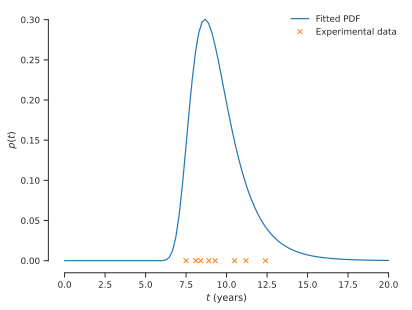

In [19]:
fig, ax = plt.subplots()
ts = np.linspace(0.0, 20.0, 100)
ax.plot(
    ts,
    T.pdf(ts),
    label="Fitted PDF"
)
ax.plot(
    time_to_fail_data,
    np.zeros_like(time_to_fail_data),
    "x",
    label="Experimental data"
)
ax.set_xlabel(r"$t$ (years)")
ax.set_ylabel(r"$p(t)$")
plt.legend(loc="best", frameon=False)
sns.despine(trim=True);

Now you have to answer a series of questions about the random variable $T$ that we just fitted.

A. Find the mean fail time and its variance.
Hint: Do not integrate anything by hand. Just use the functionality of ``scipy.stats``.

In [21]:
# Your code here
t_mean = T.expect() # Change me
t_var = T.var() # Change me
print(f"The mean fail time is E[T] = {t_mean:.2f}")
print(f"The variance is V[T] = {t_var:.2f}")

The mean fail time is E[T] = 9.53
The variance is V[T] = 2.88


B. Plot the cumulative distribution function $F(t) = P(T\le t)$ of $T$.

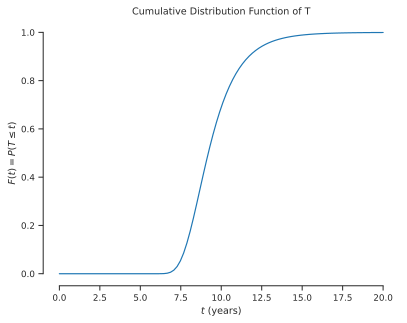

In [23]:
# Your code here
fig, ax = plt.subplots()
ax.plot(ts, T.cdf(ts))
ax.set_xlabel("$t$ (years)")
ax.set_ylabel("$F(t) = P(T \leq t)$")
ax.set_title("Cumulative Distribution Function of T")
sns.despine(trim=True);

C. Plot the probability that gear survives for more than $t$ as a function of $t$.
That is, plot the function:

$$
S(t) = p(T > t).
$$

Hint: First connect $S(t)$ to the cumulative distribution function $F(t)$ of $T$.

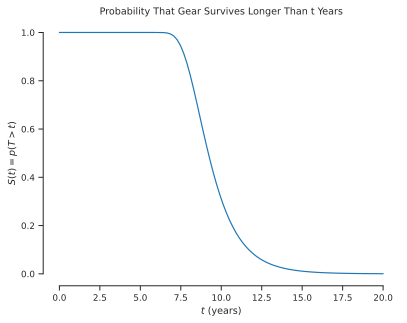

In [27]:
# Your code here
# Note that S(t) = 1 - p(T <= t) = 1 - F(t)
S = 1 - T.cdf(ts)
fig, ax = plt.subplots()
ax.plot(ts, S)
ax.set_xlabel("$t$ (years)")
ax.set_ylabel("$S(t) = p(T > t)$")
ax.set_title("Probability That Gear Survives Longer Than t Years")
sns.despine(trim=True);

D. Find the probability that the gear lasts anywhere between 8 and 10 years.

In [28]:
# Your code here
print(f"p(8 <= T <= 10) = {T.cdf(10) - T.cdf(8):.3f}")
print(f"The probability that the gear lasts between 8 and 10 years is {T.cdf(10) - T.cdf(8):.3f}")

p(8 <= T <= 10) = 0.534
The probability that the gear lasts between 8 and 10 years is 0.534


E. Find the time $t^*$ such that the probability that the gear fails before $t^*$ is $0.01$.

In [29]:
# Your code here
prob_fail = 0.01
t_star = T.ppf(prob_fail)
print(f"t* = {t_star:.2f} years")

t* = 6.98 years
